Epoch 1/1000, Error: 0.215385
Epoch 101/1000, Error: 0.001642
Epoch 201/1000, Error: 0.000560
Epoch 301/1000, Error: 0.000183
Epoch 401/1000, Error: 0.000057
Epoch 501/1000, Error: 0.000017
Epoch 601/1000, Error: 0.000005
Epoch 701/1000, Error: 0.000002
Epoch 801/1000, Error: 0.000000
Epoch 901/1000, Error: 0.000000
Epoch 1000/1000, Error: 0.000000
Prediction for x=5: 17.003419, Exact value: 17.000000


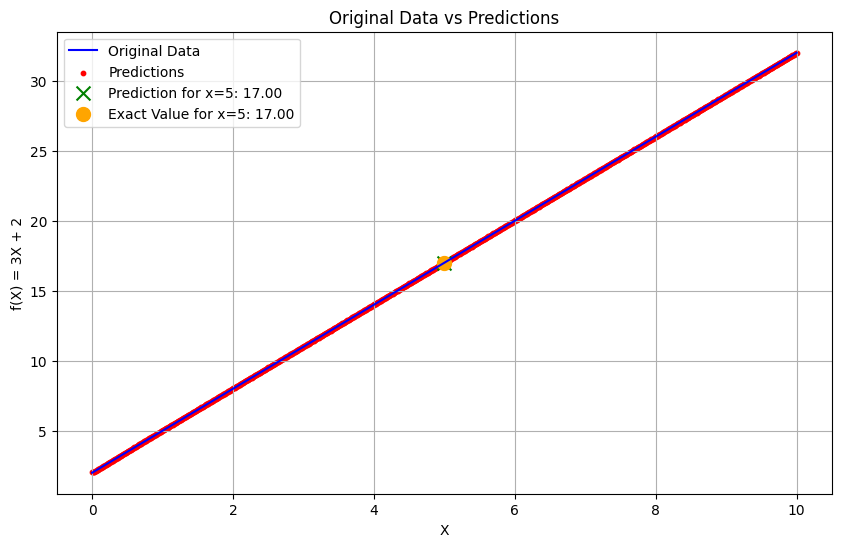

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
def generate_data(n_samples=1000, x_min=0, x_max=10):
    X = np.linspace(x_min, x_max, n_samples).reshape(-1, 1)
    y = 3 * X + 2  # Linear function y = 3x + 2

    # Store original min/max for denormalization
    X_min, X_max = X.min(), X.max()
    y_min, y_max = y.min(), y.max()

    # Normalize data
    X = (X - X_min) / (X_max - X_min)
    y = (y - y_min) / (y_max - y_min)

    return X, y, X_min, X_max, y_min, y_max

# Define activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

activation_functions = {
    'relu': (relu, relu_derivative),
    'linear': (linear, linear_derivative)
}

class NeuralNetwork:
    def __init__(self, layers, activations):
        self.layers = layers
        self.activations = activations
        self.weights = []
        self.biases = []
        self.initialize_weights()

    def initialize_weights(self):
        for i in range(len(self.layers) - 1):
            weight = np.random.randn(self.layers[i], self.layers[i + 1]) * np.sqrt(1 / self.layers[i])  # Xavier Initialization
            bias = np.zeros((1, self.layers[i + 1]))
            self.weights.append(weight)
            self.biases.append(bias)

    def feedforward(self, X):
        self.layer_outputs = [X]
        for i in range(len(self.weights)):
            activation, _ = activation_functions[self.activations[i]]
            X = activation(np.dot(X, self.weights[i]) + self.biases[i])
            self.layer_outputs.append(X)
        return X

    def backpropagation(self, X, y, learning_rate):
        output_error = y - self.layer_outputs[-1]
        _, derivative = activation_functions[self.activations[-1]]
        deltas = [output_error * derivative(self.layer_outputs[-1])]

        for i in reversed(range(len(deltas), len(self.weights))):
            _, derivative = activation_functions[self.activations[i]]
            delta = deltas[-1].dot(self.weights[i].T) * derivative(self.layer_outputs[i])
            deltas.append(delta)
        deltas.reverse()

        for i in range(len(self.weights)):
            self.weights[i] += self.layer_outputs[i].T.dot(deltas[i]) * learning_rate
            self.biases[i] += np.sum(deltas[i], axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if epoch % 100 == 0 or epoch == epochs - 1:
                mse = np.mean(np.square(y - self.layer_outputs[-1]))
                print(f'Epoch {epoch + 1}/{epochs}, Error: {mse:.6f}')

    def predict(self, X):
        return self.feedforward(X)

# Generate dataset
X, y, X_min, X_max, y_min, y_max = generate_data()

# Define network structure
input_size = 1
output_size = 1
hidden_layers = [10, 15, 10]
layers = [input_size] + hidden_layers + [output_size]
activations = ['relu', 'relu', 'relu', 'linear']

# Initialize neural network
nn = NeuralNetwork(layers, activations)

# Train the neural network
nn.train(X, y, epochs=1000, learning_rate=0.00001)

# Predict values for all X
y_pred = nn.predict(X)

# Denormalize predictions
y_pred_denorm = y_pred * (y_max - y_min) + y_min

# Predict value for x=5
x_test = np.array([[5]])
x_test_norm = (x_test - X_min) / (X_max - X_min)  # Normalize x_test

y_test_pred_norm = nn.predict(x_test_norm)
y_test_pred = y_test_pred_norm * (y_max - y_min) + y_min  # Denormalize prediction
y_exact = 3 * x_test + 2  # Exact function value
print(f'Prediction for x=5: {y_test_pred[0][0]:.6f}, Exact value: {y_exact[0][0]:.6f}')

# Plot original data and predictions
plt.figure(figsize=(10, 6))
plt.plot(X * (X_max - X_min) + X_min, y * (y_max - y_min) + y_min, label='Original Data', color='blue')
plt.scatter(X * (X_max - X_min) + X_min, y_pred_denorm, label='Predictions', color='red', s=10)
plt.scatter(x_test, y_test_pred, label=f'Prediction for x=5: {y_test_pred[0][0]:.2f}', color='green', s=100, marker='x')
plt.scatter(x_test, y_exact, label=f'Exact Value for x=5: {y_exact[0][0]:.2f}', color='orange', s=100, marker='o')
plt.title('Original Data vs Predictions')
plt.xlabel('X')
plt.ylabel('f(X) = 3X + 2')
plt.legend()
plt.grid(True)
plt.show()
